<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></span><ul class="toc-item"><li><span><a href="#Librairies" data-toc-modified-id="Librairies-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Librairies</a></span></li><li><span><a href="#Options" data-toc-modified-id="Options-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Options</a></span></li><li><span><a href="#Fonctions" data-toc-modified-id="Fonctions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Fonctions</a></span></li><li><span><a href="#Données" data-toc-modified-id="Données-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Données</a></span></li></ul></li><li><span><a href="#Etude-de-la-faisabilité-via-Texte" data-toc-modified-id="Etude-de-la-faisabilité-via-Texte-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Etude de la faisabilité via Texte</a></span><ul class="toc-item"><li><span><a href="#Bag-of-words" data-toc-modified-id="Bag-of-words-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Bag-of-words</a></span></li><li><span><a href="#TF-IDF" data-toc-modified-id="TF-IDF-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>TF-IDF</a></span></li><li><span><a href="#Word2Vec" data-toc-modified-id="Word2Vec-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Word2Vec</a></span></li><li><span><a href="#Doc2Vec" data-toc-modified-id="Doc2Vec-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Doc2Vec</a></span></li><li><span><a href="#BERT" data-toc-modified-id="BERT-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>BERT</a></span></li><li><span><a href="#USE" data-toc-modified-id="USE-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>USE</a></span></li></ul></li></ul></div>

# Import

## Librairies

In [48]:
# builtin
import os, sys, time, random

# data
import numpy as np
import pandas as pd

# collection
from collections import Counter

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer

# pipeline
from sklearn.pipeline import make_pipeline
from nltk.tokenize import word_tokenize, wordpunct_tokenize

#NLP
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

# Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import gensim
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument

# BERT
from transformers import BertTokenizer, BertModel
import torch

# USE
import tensorflow_hub as hub

# clustering
from sklearn import cluster, metrics

# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# diminution feature
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# graphics
import seaborn as sns
import matplotlib.pyplot as plt

## Options

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thomas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Fonctions

In [3]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features, original_labels, categ):
    time1 = time.time()
    num_labels = len(categ)
    tsne = TSNE(n_components=2,
                perplexity=30,
                n_iter=2000,
                init='random',
                learning_rate=200,
                random_state=42)
    X_tsne = tsne.fit_transform(features)

    # Détermination des clusters à partir des données après Tsne
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(original_labels, cls.labels_),
                   4)
    time2 = np.round(time.time() - time1, 0)
    print("ARI : ", ARI, "time : ", time2)

    return ARI, X_tsne


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, categ, ARI):

    fig = plt.figure(figsize=(10, 6))

    scatter = plt.scatter(X_tsne[:, 0],
                          X_tsne[:, 1],
                          c=y_cat_num,
                          cmap='Set1',
                          alpha=0.8)
    plt.legend(handles=scatter.legend_elements()[0],
               labels=set(categ),
               loc='center left',
               bbox_to_anchor=(1, 0.5),
               title="Catégorie")
    plt.title('Représentation des produits par catégories réelles')

    plt.show()
    print("ARI : ", ARI)

## Données

In [4]:
df = pd.read_csv(
    "../Data/final.csv")
df.head()

,text,main_category,clean_text,image_name
0,Elegance Polyester Multicolor Abstract Eyelet ...,Home Furnishing,elegance polyester multicolor abstract eyelet ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,Sathiyas Cotton Bath Towel Specifications of S...,Baby Care,cotton bath towel specification cotton bath to...,7b72c92c2f6c40268628ec5f14c6d590.jpg
2,Eurospa Cotton Terry Face Towel Set Key Featur...,Baby Care,cotton terry face towel set key feature cotton...,64d5d4a258243731dc7bbb1eef49ad74.jpg
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Home Furnishing,royal fashion cotton printed king sized double...,d4684dcdc759dd9cdf41504698d737d8.jpg
4,Jaipur Print Cotton Floral King sized Double B...,Home Furnishing,print cotton floral king sized double key feat...,6325b6870c54cd47be6ebfbffa620ec7.jpg


In [5]:
df.shape

(1050, 4)

In [6]:
categ = list(set(df['main_category']))
print("catégories : ", categ)
y_cat_num = [(1 - categ.index(df.iloc[i]['main_category']))
             for i in range(len(df))]

catégories :  ['Beauty and Personal Care', 'Home Furnishing', 'Baby Care', 'Home Decor & Festive Needs', 'Computers', 'Kitchen & Dining', 'Watches']


In [7]:
df["length_text"] = df['clean_text'].apply(lambda x: len(word_tokenize(x)))
print("max length text : ", df['length_text'].max())

max length text :  308


# Etude de la faisabilité via Texte

## Bag-of-words

In [8]:
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df["clean_text"])

pd.DataFrame(X_bow.toarray(), columns=bow_vectorizer.vocabulary_).head()

,elegance,polyester,multicolor,abstract,eyelet,door,curtain,key,feature,floral,...,suede,squeeze,helpful,member,sweeping,receive,final,practice,polyvinyl,film
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print("CountVectorizer : ")
print("-----------------")
ARI_bow, X_bow_tsne = ARI_fct(X_bow, y_cat_num, categ)

CountVectorizer : 
-----------------
ARI :  0.4447 time :  10.0


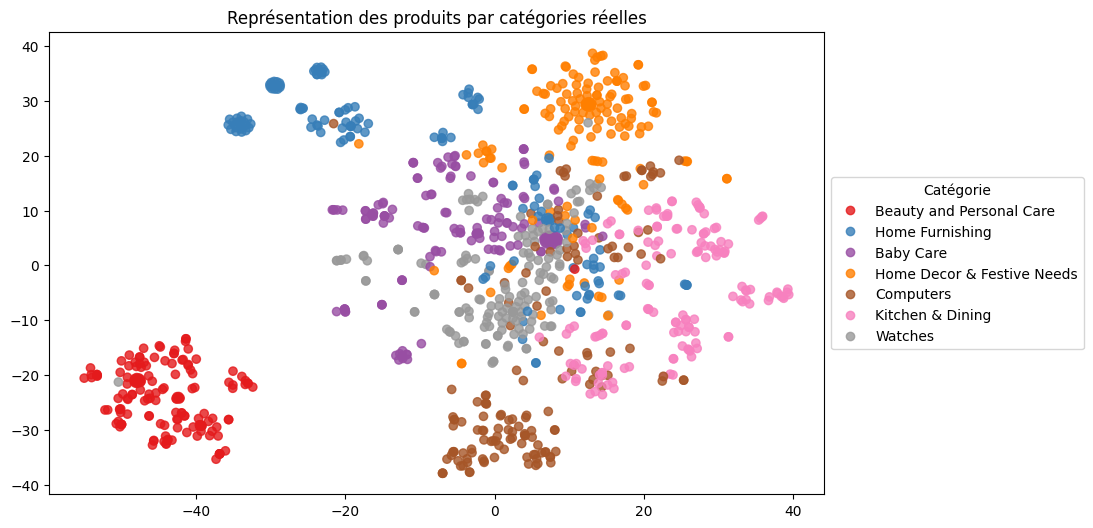

ARI :  0.4447


In [10]:
 TSNE_visu_fct(X_bow_tsne, y_cat_num, categ, ARI_bow)

Quelques groupes bien distincts : Home Furnishing (rouge), Beauty and Personnal Care (marron), Computers (rose), Kitchen & Dining (orange) \
mais Watches (mauve), Baby Care (gris) et Home decor & Festive Need (bleu) plus mélangés.

## TF-IDF

In [11]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df["clean_text"])

pd.DataFrame(X_tfidf.toarray(),columns=tfidf_vectorizer.vocabulary_).head()

,elegance,polyester,multicolor,abstract,eyelet,door,curtain,key,feature,floral,...,suede,squeeze,helpful,member,sweeping,receive,final,practice,polyvinyl,film
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.068809,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
print("TF-idf : ")
print("-----------------")
ARI_tfidf, X_tfidf_tsne = ARI_fct(X_tfidf, y_cat_num, categ)

TF-idf : 
-----------------
ARI :  0.4901 time :  8.0


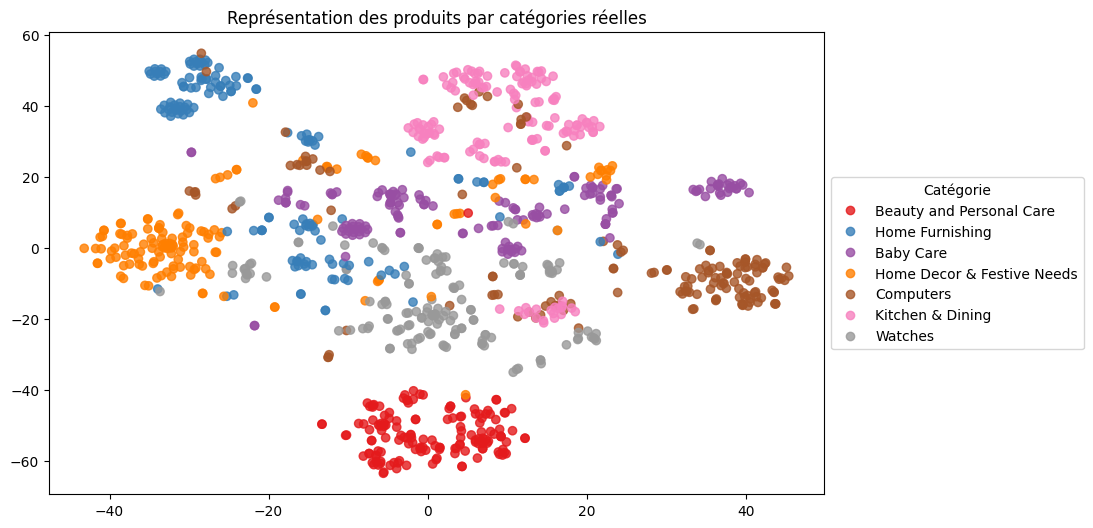

ARI :  0.4901


In [13]:
TSNE_visu_fct(X_tfidf_tsne, y_cat_num, categ, ARI_tfidf)

Groupes plus distincts : Kitchen & Dining (orange), Home Decor (bleu), Computers (rose), Watches (mauve) \
Home Furnishing (rouge), Beauty and Personnal Care (marron) et Baby Care (gris) plus dispersés

## Word2Vec

In [14]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = df['length_text'].max()

sentences = df['clean_text'].to_list()
sentences_w2v = [gensim.utils.simple_preprocess(text) for text in sentences]

In [31]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences_w2v)
w2v_model.train(sentences_w2v, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 3153
Word2Vec trained


In [44]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences_w2v)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences_w2v),
                            maxlen=maxlen,
                            padding='post')

num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Number of unique words: 3154


In [46]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embeddings_w2v = np.zeros((len(x_sentences), w2v_size))

for i, sentence in enumerate(x_sentences):

    sum_vec = np.zeros((1, w2v_size))

    for word in sentence:
        if word in w2v_model.wv:
            vector = w2v_model.wv[word]
            sum_vec += vector
        else:
            print("mots ignorés :", word)
            continue

    embeddings_w2v[i] = sum_vec

print("Forme de la matrix :", embeddings_w2v.shape)

Create Embedding matrix ...
mots ignorés : 3153
Forme de la matrix : (1050, 300)


In [36]:
ARI_w2v, X_w2v_tsne = ARI_fct(embeddings_w2v, y_cat_num, categ)

ARI :  0.1181 time :  8.0


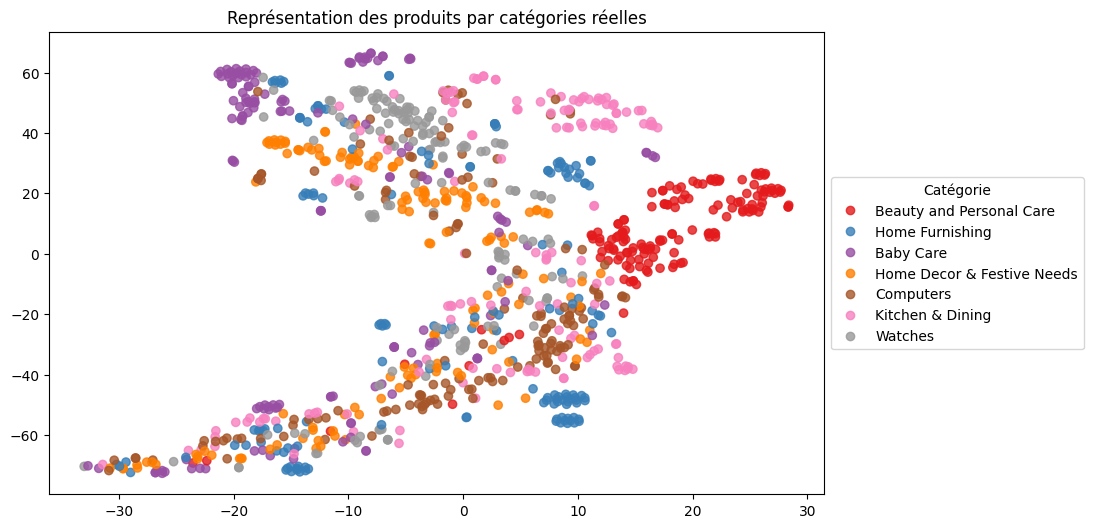

ARI :  0.1181


In [38]:
TSNE_visu_fct(X_w2v_tsne, y_cat_num, categ, ARI_w2v)

## Doc2Vec

In [51]:
# Création des documents tagués pour Doc2Vec
tagged_data = [TaggedDocument(words=gensim.utils.simple_preprocess(text), tags=[str(i)]) for i, text in enumerate(sentences)]

# Initialisation et entraînement du modèle Doc2Vec
d2v_model = Doc2Vec(vector_size=w2v_size, window=w2v_window, min_count=w2v_min_count, epochs=w2v_epochs, workers=1)
d2v_model.build_vocab(tagged_data)
d2v_model.train(tagged_data, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)

In [52]:
embeddings_d2v = np.zeros((len(sentences), w2v_size))

for i, text in enumerate(sentences):
    tokens = gensim.utils.simple_preprocess(text)
    embedding_vector = d2v_model.infer_vector(tokens)
    embeddings_d2v[i] = embedding_vector

print("Forme de la matrice Doc2Vec :", embeddings_d2v.shape)

Forme de la matrice Doc2Vec : (1050, 300)


In [53]:
ARI_d2v, X_d2v_tsne = ARI_fct(embeddings_d2v, y_cat_num, categ)

ARI :  0.1081 time :  9.0


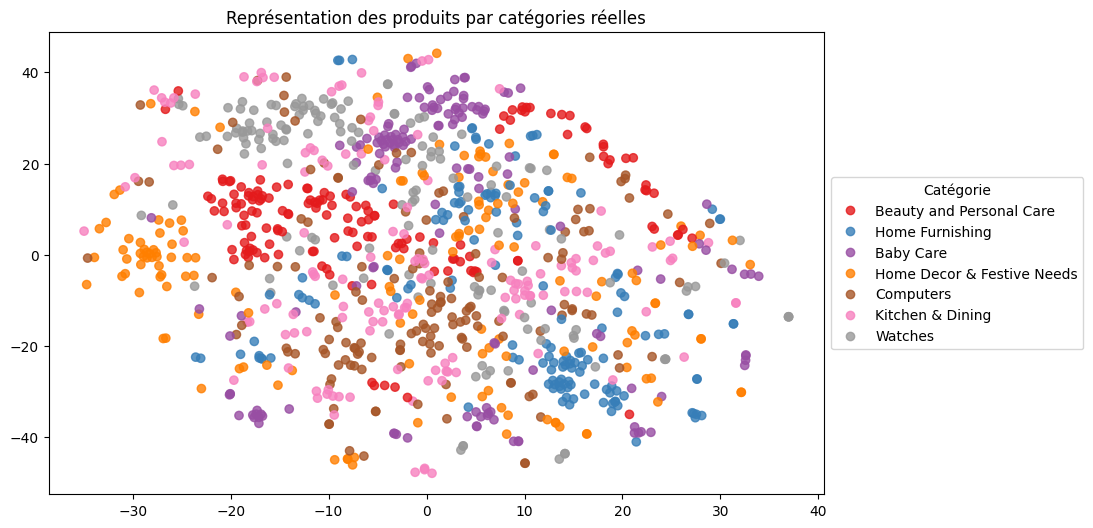

ARI :  0.1081


In [54]:
TSNE_visu_fct(X_d2v_tsne, y_cat_num, categ, ARI_d2v)

## BERT

In [39]:
model_type="bert-base-uncased"
batch_size=10

tokenizer = BertTokenizer.from_pretrained(model_type)
model = BertModel.from_pretrained(model_type)
sentences = df["clean_text"].to_list()

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

C:\Users\Thomas\AppData\Local\pypoetry\Cache\virtualenvs\projet6-mnlG3Dat-py3.11\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Thomas\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [42]:
embeddings_bert = np.zeros((len(sentences), 768))
for i, sentence in enumerate(sentences):
    encoded_input = tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=128, padding="longest", return_tensors="pt")
    model_output = model(encoded_input["input_ids"])
    embeddings_bert[i]=model_output[0][:, 0, :].detach().numpy()

In [55]:
ARI_bert, X_bert_tsne = ARI_fct(embeddings_bert, y_cat_num, categ)

ARI :  0.281 time :  8.0


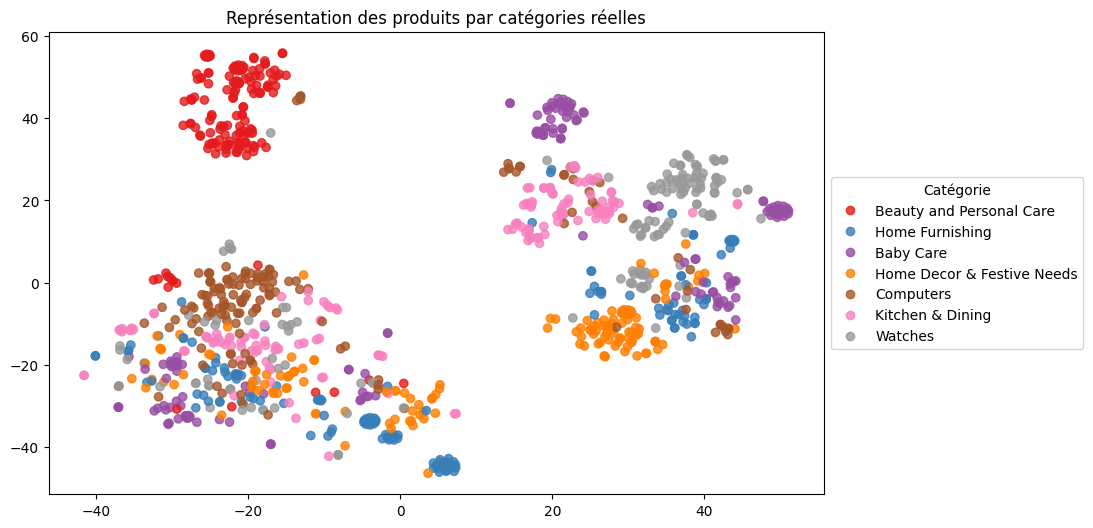

ARI :  0.281


In [56]:
TSNE_visu_fct(X_bert_tsne, y_cat_num, categ, ARI_bert)

Beauty and Personnal Care bien distinct mais le reste trop mélangé

## USE

In [57]:
use_url = "https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2"
embed = hub.load(use_url)
embeddings_use = embed(sentences)

In [58]:
ARI_use, X_use_tsne = ARI_fct(embeddings_use, y_cat_num, categ)

ARI :  0.4006 time :  8.0


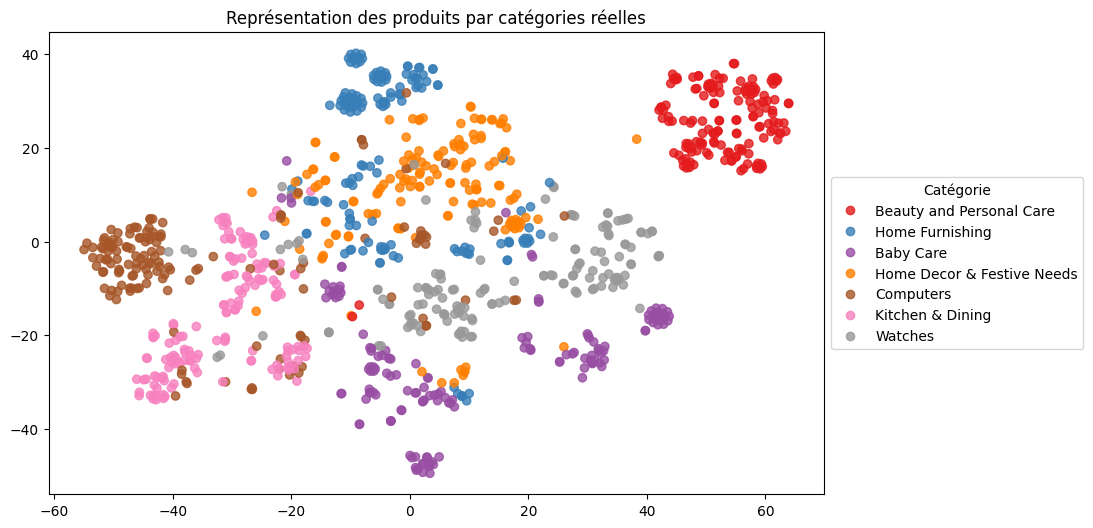

ARI :  0.4006


In [59]:
TSNE_visu_fct(X_use_tsne, y_cat_num, categ, ARI_use)

Marron, gris et rouge assez distinct et reste, trop dispersé